# YXG-32H Magnet Parameters

| 항목 | 값 |
|------|------|
| **Material** | Sm₂Co₁₇ (Sm2Co17 / Sm2(CoFeCuZr)17) |
| **Grade** | **YXG-32** |
| **Remanence Br** | **1.10 – 1.13 T** (11.0 – 11.3 kGs) |
| **Coercivity Force Hcb** | **812 – 860 kA/m** (10.2 – 10.8 kOe) |
| **Intrinsic Coercivity Hcj** | **≥1990 kA/m** (≥25 kOe) |
| **Maximum Energy Product (BH)max** | **230 – 255 kJ/m³** (29 – 32 MGOe) |
| **Max Working Temperature** | **350 °C** |


# YXG-32 Magnet Parameters

| 항목 | 값 |
|------|------|
| **Grade** | **YXG-32** |
| **Remanence Br** | **1.10–1.13 T** (11.0–11.3 kGs) |
| **Coercivity Force Hcb** | **812–860 kA/m** |
| **Coercivity Force Hcb (kOe)** | **10.2–10.8 kOe** |
| **Intrinsic Coercivity Hcj** | **≥1433 kA/m** |
| **Intrinsic Coercivity Hcj (kOe)** | **≥18 kOe** |
| **Maximum Energy Product (BH)max** | **230–255 kJ/m³** (30–33 MGOe) |
| **Max Working Temperature** | **300 °C** |


# Magnetization Calculation

$$
M \approx B_r/\mu_0, Remanence \approx 1.10 \sim 1.13 T 
$$ 

Magnetization M ≈ 8.87e+05 A/m


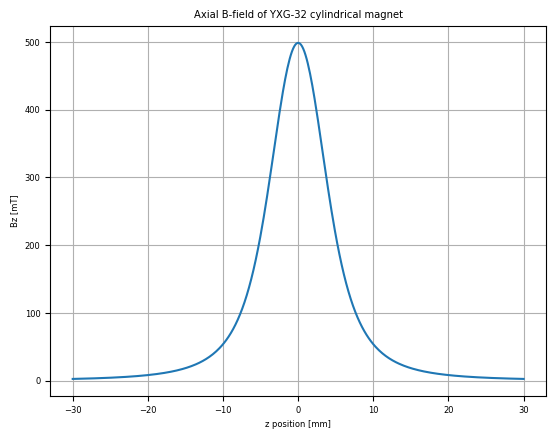

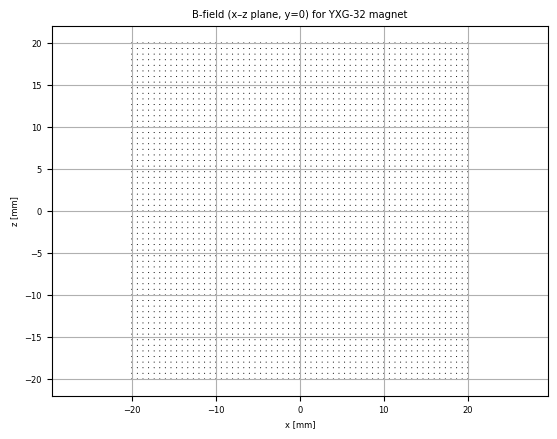

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import magpylib as magpy
from magpylib.magnet import Cylinder

# ==========================
# 0. YXG-32 재료 파라미터
# ==========================
Br_min, Br_max = 1.10, 1.13        # [T]
Br = 0.5 * (Br_min + Br_max)       # 중간값 1.115 T

mu0 = 4 * np.pi * 1e-7             # [H/m]
M = Br / mu0                       # [A/m] ≈ 8.9e5 A/m

print(f"Magnetization M ≈ {M:.2e} A/m")

# ==========================
# 1. 원통형 자석 정의
#    (사이즈는 예시값, 꼭 수정해서 사용)
# ==========================
D = 0.010   # 직경 10 mm
H = 0.005   # 높이 5 mm

mag = Cylinder(
    dimension=(D, H),              # (diameter, height) in meters
    magnetization=(0, 0, M),       # z축 방향 자화 (YXG-32)
    position=(0, 0, 0),            # 중심 원점
)

# ==========================
# 2. 축 방향(z-axis) 자기장 프로파일
# ==========================
z = np.linspace(-0.03, 0.03, 400)   # -30~+30 mm 범위
pos_axis = np.column_stack([
    np.zeros_like(z),
    np.zeros_like(z),
    z,
])

B_axis = magpy.getB(mag, pos_axis)  # [T], shape (N, 3)
Bz_axis = B_axis[:, 2]

plt.figure()
plt.plot(z*1e3, Bz_axis*1e3)
plt.xlabel('z position [mm]')
plt.ylabel('Bz [mT]')
plt.title('Axial B-field of YXG-32 cylindrical magnet')
plt.grid(True)

# ==========================
# 3. x–z 평면 2D 자기장 맵 (y=0)
# ==========================
xs = np.linspace(-0.02, 0.02, 61)   # -20~+20 mm
zs = np.linspace(-0.02, 0.02, 61)

X, Z = np.meshgrid(xs, zs)
pos_plane = np.column_stack([
    X.ravel(),
    np.zeros_like(X).ravel(),       # y=0 평면
    Z.ravel(),
])

B_plane = magpy.getB(mag, pos_plane)
Bx = B_plane[:, 0].reshape(X.shape)
Bz = B_plane[:, 2].reshape(X.shape)

plt.figure()
plt.quiver(X*1e3, Z*1e3, Bx, Bz, pivot='mid', scale=5e5)
plt.xlabel('x [mm]')
plt.ylabel('z [mm]')
plt.title('B-field (x–z plane, y=0) for YXG-32 magnet')
plt.axis('equal')
plt.grid(True)

plt.show()


In [ ]:
import magpylib as magpy
import numpy as np
from matplotlib import pyplot as plt

# set font size
plt.rcParams.update({'font.size': 8})

# ==========================
# YXG-32 Material Parameters
# ==========================
# Remanence Br
Br_min, Br_max = 1.10, 1.13  # [T]
Br = 0.5 * (Br_min + Br_max)  # 중간값 1.115 T

# Coercivity Force Hcb
Hcb_min, Hcb_max = 812, 860  # [kA/m]
Hcb = 0.5 * (Hcb_min + Hcb_max) * 1e3  # 836 kA/m -> A/m

# Intrinsic Coercivity Hcj
Hcj = 1433e3  # ≥1433 kA/m -> A/m (minimum value)

# Maximum Energy Product (BH)max
BHmax_min, BHmax_max = 230, 255  # [kJ/m³]
BHmax = 0.5 * (BHmax_min + BHmax_max) * 1e3  # 242.5 kJ/m³ -> J/m³

# Physical constants
mu0 = 4 * np.pi * 1e-7  # [H/m]

# Magnetization
M = Br / mu0  # [A/m] ≈ 8.87e5 A/m

print("=" * 50)
print("YXG-32 Sm₂Co₁₇ Magnet Parameters")
print("=" * 50)
print(f"Remanence Br = {Br:.3f} T")
print(f"Coercivity Hcb = {Hcb/1e3:.1f} kA/m")
print(f"Intrinsic Coercivity Hcj ≥ {Hcj/1e3:.0f} kA/m")
print(f"(BH)max = {BHmax/1e3:.1f} kJ/m³")
print(f"Magnetization M = {M:.2e} A/m")
print("=" * 50)

# ==========================
# Cylinder Magnet Definition
# ==========================
D = 30  # 직경 [mm]
H = 35  # 높이 [mm]

# create cylinder magnet
cylinder = magpy.magnet.Cylinder(
    polarization=(0, 0, Br),  # z-axis magnetization [T]
    dimension=(D, H),          # (diameter, height) in mm
)

print(f"\nCylinder Magnet: D = {D} mm, H = {H} mm")
print(f"Volume = {np.pi * (D/2)**2 * H:.1f} mm³")

# ==========================
# Position Grid
# ==========================
ts = np.linspace(-60, 60, 100)  # -60 to +60 mm
posis = np.array([(x, 0, z) for z in ts for x in ts])
X, Z = np.meshgrid(ts, ts)

# ==========================
# Create Figure with 2 Subplots
# ==========================
fig = plt.figure(figsize=(12, 5))
ax3d = fig.add_subplot(1, 2, 1, projection='3d')
ax2d = fig.add_subplot(1, 2, 2)

# 3D display
cylinder.show(canvas=ax3d, backend='matplotlib')
ax3d.set_title(f'YXG-32 Cylinder Magnet\n(D={D}mm, H={H}mm, Br={Br:.2f}T)')

# 2D field plot
B = cylinder.getB(posis).reshape(100, 100, 3)
B_magnitude = np.linalg.norm(B, axis=2)

# pcolor for amplitude
pcm = ax2d.pcolor(X, Z, B_magnitude, cmap='coolwarm', shading='auto')
cbar = plt.colorbar(pcm, ax=ax2d)
cbar.set_label('|B| [mT]')

# streamplot for field lines
ax2d.streamplot(X, Z, B[:, :, 0], B[:, :, 2], color='k', linewidth=0.5, density=1.5)

# Draw magnet outline
rect_x = [-D/2, D/2, D/2, -D/2, -D/2]
rect_z = [-H/2, -H/2, H/2, H/2, -H/2]
ax2d.plot(rect_x, rect_z, 'g-', linewidth=2, label='Magnet')

ax2d.set_xlabel('x [mm]')
ax2d.set_ylabel('z [mm]')
ax2d.set_title(f'B-field (x-z plane, y=0)\nYXG-32: Br={Br:.2f}T, M={M:.2e}A/m')
ax2d.set_aspect('equal')
ax2d.legend(loc='upper right')

plt.tight_layout()
plt.show()

# ==========================
# Print Field Values at Key Points
# ==========================
print("\n" + "=" * 50)
print("Magnetic Field at Key Points")
print("=" * 50)

# On-axis points
z_points = [0, H/2, H, 2*H]  # center, surface, 1H away, 2H away
for z_pt in z_points:
    B_pt = cylinder.getB([0, 0, z_pt])
    print(f"z = {z_pt:5.1f} mm: Bz = {B_pt[2]*1000:8.2f} mT ({B_pt[2]:.4f} T)")

print("=" * 50)